In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location_3',
       'spacial_location_5', 'LRO_discharge', 'LRO_discharge_site',
       'turbidity', 'vegetation', 'visibility', 'cloudcover', 'solarradiation',
       'uvindex', 'conditions', 'v_pos'],
      dtype='object')


,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,0
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,0
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,0
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,0
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1


<Axes: xlabel='turbidity', ylabel='Count'>

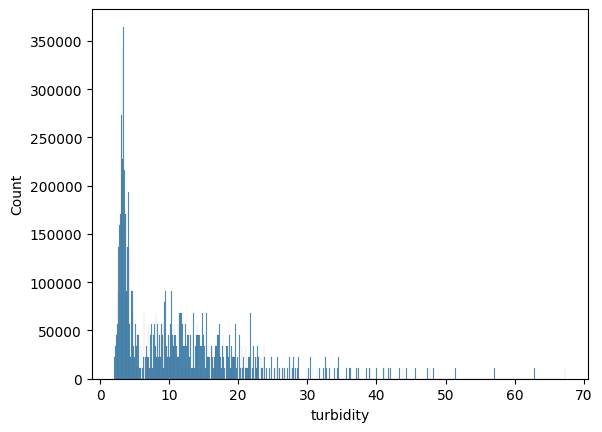

In [4]:
sns.histplot(
    data=df,
    x='turbidity'
)

<Axes: xlabel='datetime', ylabel='turbidity'>

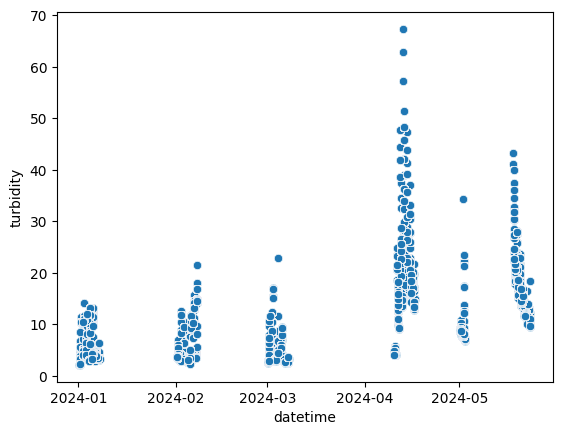

In [5]:
sns.scatterplot(
    data=df,
    x='datetime',
    y='turbidity'
)

<Axes: xlabel='LRO_discharge', ylabel='turbidity'>

/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/waterlab/anaconda3/envs/pyorc/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


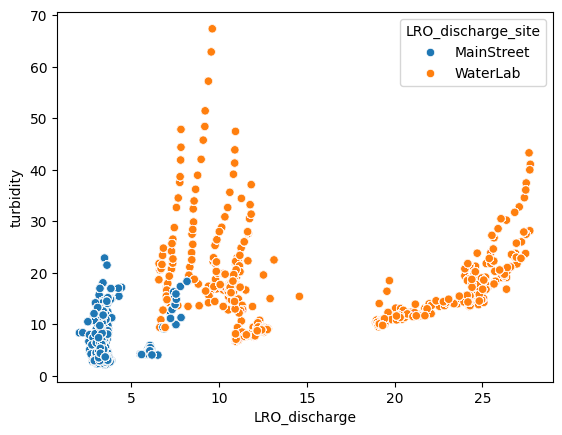

In [6]:
sns.scatterplot(
    data=df,
    x='LRO_discharge',
    y='turbidity',
    hue='LRO_discharge_site'
)

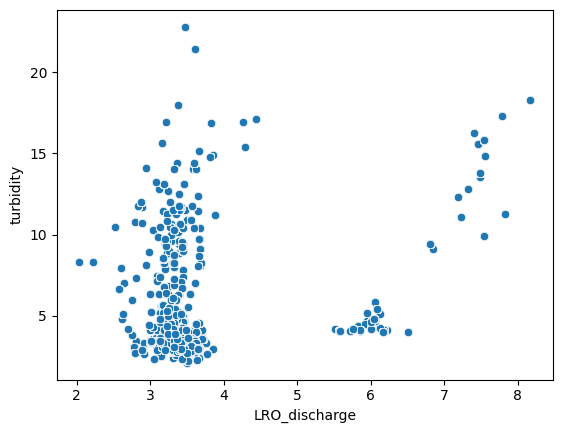

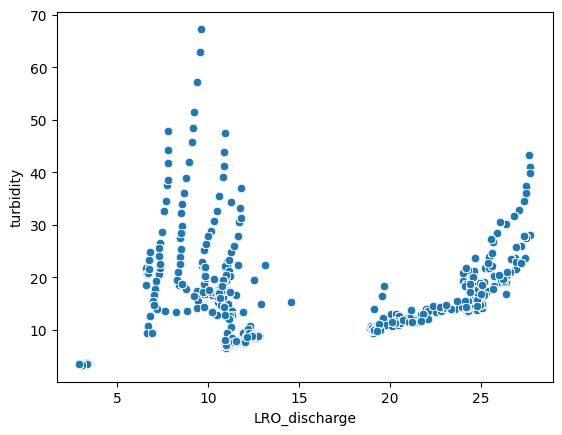

In [7]:
sns.scatterplot(
    data=df[df.LRO_discharge_site == 'MainStreet'],
    x='LRO_discharge',
    y='turbidity',
)
plt.show()

sns.scatterplot(
    data=df[df.LRO_discharge_site == 'WaterLab'],
    x='LRO_discharge',
    y='turbidity',
)
plt.show()

In [22]:
df2 = df.groupby(['datetime', 'turbidity']).agg({'v_len': 'sum'}).reset_index()
df2.v_len.unique()


array([2389.73393259, 2496.23013051, 2698.61483793, 2854.37976554,
       3157.9035297 , 2988.41409914, 3115.75646482, 3168.30791403,
       3031.96256817, 3093.44288619, 3052.39182587, 3093.95312245,
       3195.20131261, 3220.70043377, 3180.23389947, 3195.76157945,
       3190.17727479, 3027.86294533, 3072.91119194, 2749.93202858,
       2736.62073683, 2802.38905502, 3146.58338332, 2994.03812011,
       2990.50446325, 2973.51904807, 2748.94910067, 2379.13084295,
       2204.94816258, 3257.86287816, 3362.55485485, 3436.38561034,
       3313.93472279, 3501.27792291, 2796.58985669, 2335.17407621,
       1708.27444091, 2682.12129789, 2997.94146845, 3074.1587078 ,
       2497.89921386, 2629.98152232, 3219.44385826, 2594.65010266,
       2733.37223427, 2517.54293581, 2557.02782552, 2462.88205317,
       2579.42725868, 2258.11173485, 2815.01218525, 2993.48682665,
       2704.56875044, 2078.7204196 , 1170.37674039, 2619.16583468,
       3068.7180766 , 2855.06144383, 2952.05730826, 2726.50856

<Axes: xlabel='v_len', ylabel='turbidity'>

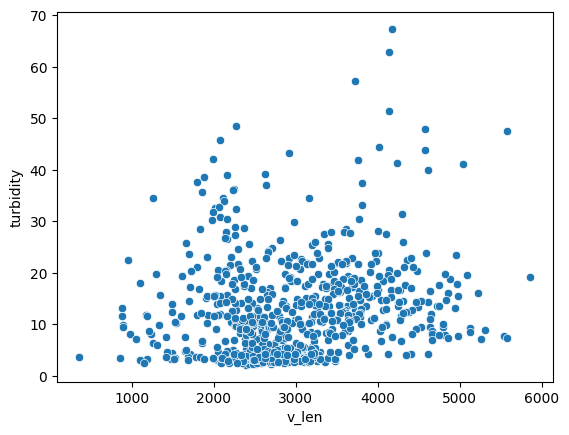

In [23]:
sns.scatterplot(
    data=df2,
    x='v_len',
    y='turbidity'
)